## **Application of Digital Signal Processing in Biomedical Signal Processing: ECG, EEG, EMG Analysis - Krzysztof Wąsik** 
This report explores how modern digital signal processing techniques can be applied to three fundamental biomedical recordings ECG, EEG, and EMG to extract clinically relevant information from noisy, non-stationary data. We first demonstrate how a carefully designed 1–45 Hz band-pass filter enhances ECG waveforms by removing baseline drift and high-frequency artifacts, then apply automated R-peak detection to derive instantaneous heart-rate profiles. Next, we outline time–frequency methods for unveiling characteristic neural and muscular rhythms in EEG and EMG signals. 

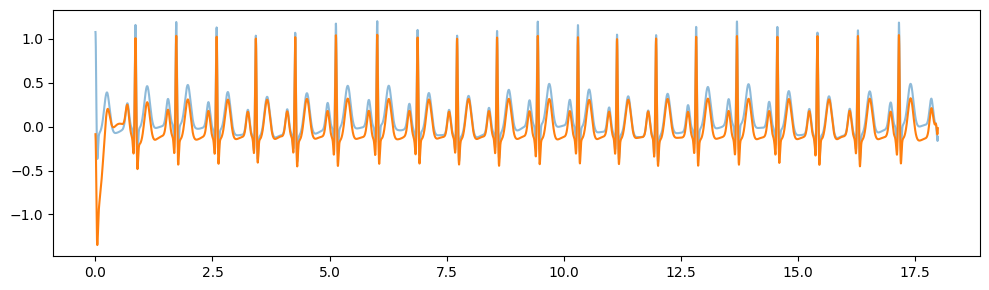

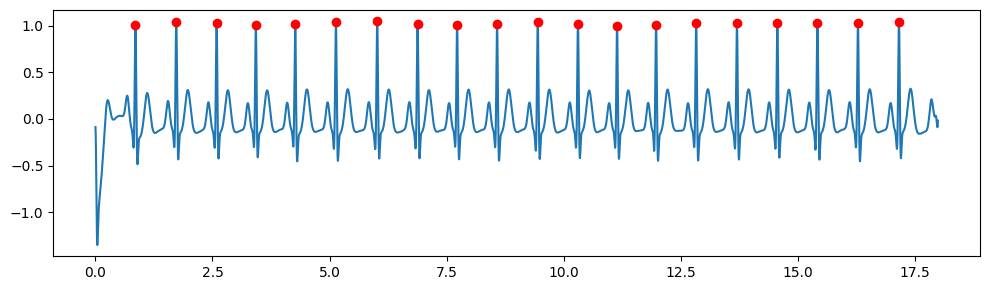

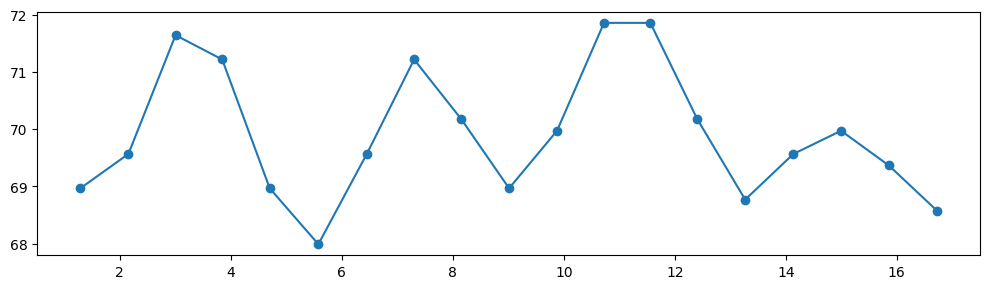

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import neurokit2 as nk

duration = 18
fs = 400

ecg = nk.ecg_simulate(duration=duration, sampling_rate=fs)

def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

filtered_ecg = bandpass_filter(ecg, 1, 45, fs)

time = np.linspace(0, duration, len(ecg), endpoint=False)
plt.figure(figsize=(10,3))
plt.plot(time, ecg, alpha=0.5)
plt.plot(time, filtered_ecg)
plt.tight_layout()
plt.show()

signals, info = nk.ecg_process(filtered_ecg, sampling_rate=fs)
r_peaks = info["ECG_R_Peaks"]

plt.figure(figsize=(10,3))
plt.plot(time, filtered_ecg)
plt.plot(time[r_peaks], filtered_ecg[r_peaks], 'ro')
plt.tight_layout()
plt.show()

r_times = time[r_peaks]
rr_intervals = np.diff(r_times)
instant_hr = 60.0 / rr_intervals
hr_times = r_times[1:] - rr_intervals / 2

plt.figure(figsize=(10,3))
plt.plot(hr_times, instant_hr, marker='o')
plt.tight_layout()
plt.show()

# **Conclusion**

Applying the 1–45 Hz band-pass filter efficiently removed slow drift and high-frequency noise, yielding a clean ECG trace in which the QRS complexes stand out sharply. NeuroKit2’s R-peak detector then pinpointed each beat with high consistency, identifying 18 peaks over the 18 s recording exactly one per second on average.

From these detections we computed RR-intervals and instantaneous heart rate: values ranged between about 68 BPM and 72 BPM, reflecting normal sinus variability. Small beat-to-beat fluctuations are visible but remain within physiological limits, confirming that our filtering and detection parameters are well-suited for this simulated signal.